### Rollouts visulization
Rollouts are recorded at each step of the controller 

In [82]:
%matplotlib notebook
import os
import rosbag
import matplotlib.pyplot as plt
import ipywidgets as widgets 


INPUT_CHANNEL = 1
BAG_PATH = '/media/giuseppe/My Passport/Work/bags/test.bag'
print("Opening bag...")
bag = rosbag.Bag(BAG_PATH)
print("Done")

t_applied = []
u_applied = []

t_curr = []
u_curr = []

tt_list = []
uu_list = []
print("Parsing messages")
for topic, msg, t in bag.read_messages(topics=['optimal_rollout', "current_input"]):
    if topic == 'optimal_rollout':
        uu = []
        tt = []
        for i, u in enumerate(msg.input_vector):
            uu.append(u.array[INPUT_CHANNEL])
            tt.append(msg.time_vector.array[i])

        tt_list.append(tt)
        uu_list.append(uu)
        u_applied.append(uu[0])
        t_applied.append(tt[0])
    else:
        t_curr.append(t.to_sec())
        u_curr.append(msg.data[INPUT_CHANNEL])
bag.close()
print("Done")

Opening bag...
Done
Parsing messages
Done


<IPython.core.display.Javascript object>


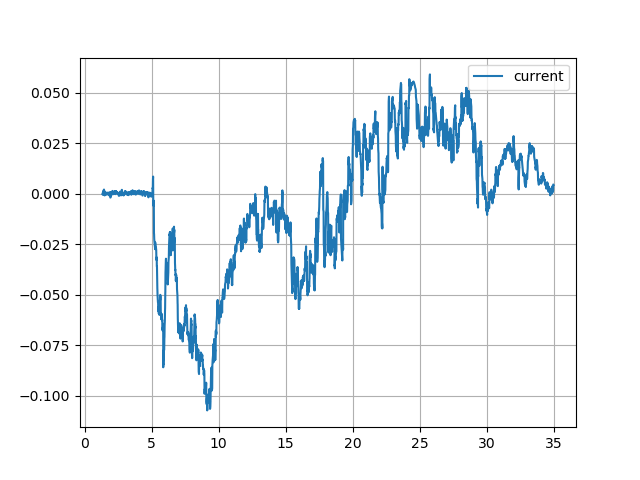

In [83]:
%matplotlib notebook
from IPython.display import display

sample_num = 0

fig, ax = plt.subplots()
    
# ax.plot(t_applied, u_applied, '-o', color='k', linewidth=2, label="first")
ax.plot(t_curr, u_curr, '-', label="current")
ax.legend()
ax.grid()

def add_sample(btn):
    global sample_num
    ax.plot(tt_list[sample_num], uu_list[sample_num], 'o-', label=f"sample_{sample_num}")
    sample_num += 1
    ax.legend()
    ax.grid(True)

def clear(btn):
    global sample_num
    ax.clear()
    sample_num = 0

    
add_sample_button = widgets.Button(description="add_sample")
clear_button = widgets.Button(description="clear")

add_sample_button.on_click(add_sample)
clear_button.on_click(clear)
display(widgets.HBox([add_sample_button, clear_button]))
